<a href="https://colab.research.google.com/github/B-d-8/buyaround_network/blob/main/SCDV%E5%AE%8C%E6%88%90%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/covid_guideline_study

/content/drive/MyDrive/covid_guideline_study


In [ ]:
import pandas as pd
cv = pd.read_csv('text_df_1102.csv')

FileNotFoundError: ignored

In [ ]:
##初期設定が必要なもの
# tika取得とインポート
!pip install tika
# 日本語を使うために
!pip install japanize_matplotlib

# colab環境でのMeCabの取得とインポート
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

###初期importするとよいもの
from tika import parser
import csv
import MeCab
import textwrap


import pandas as pd
import glob
import os
from tqdm import tqdm_notebook as tqdm
import logging
import numpy as np
from gensim.models import Word2Vec
import MeCab
import time
from sklearn.preprocessing import normalize
import sys
import re
import japanize_matplotlib  
from matplotlib import font_manager
fp = font_manager.FontProperties(fname="ipag.ttf")

  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32893 sha256=858368bba0804760fb11e4d4e539e370fcd23d43330db1edfb83fc73e09d477f
  Stored in directory: /root/.cache/pip/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika
     |████████████████████████████████| 4.1 MB 5.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=17098c86249d00786326e476311dc24d6ff3db94cf2d83a4035686f94a8eba59
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-me

In [ ]:
!pip install wordcloud

In [ ]:
cv

,title,url,cat,NFD,content
0,全国公民館連合会,https://www.kominkan.or.jp/file/all/2020/2020...,art,b'\xe5\x85\xa8\xe5\x9b\xbd\xe5\x85\xac\xe6\xb0...,20201002【改訂】公民館における新型コロナウイルス感染拡大予防ガイドライン1公民館にお...
1,日本クラシック音楽事業協会,https://storage.googleapis.com/classicorjp-pu...,art,b'\xe6\x97\xa5\xe6\x9c\xac\xe3\x82\xaf\xe3\x83...,1クラシック音楽公演における新型コロナウイルス感染拡大予防ガイドライン令和２年６月１１日策定...
2,緊急事態舞台芸術ネットワーク,http://jpasn.net/stage_guideline0918d.pdf,art,b'\xe7\xb7\x8a\xe6\x80\xa5\xe4\xba\x8b\xe6\x85...,MicrosoftWord-200918set舞台芸術ガイドライン.docx1舞台芸術公演に...
3,全日本合唱連盟,https://jcanet.or.jp/JCAchorusguideline-ver1_...,art,b'\xe5\x85\xa8\xe6\x97\xa5\xe6\x9c\xac\xe5\x90...,JCAchorusguideline-ver1_1合唱活動における新型コロナウイルス感染症拡...
4,全興連映画館,https://www.zenkoren.or.jp/news-pdf/0919-1_CO...,art,b'\xe5\x85\xa8\xe8\x88\x88\xe9\x80\xa3\xe6\x98...,令和２年８月２０日版からの変更点旧（８月２０日版）新（９月１９日施行版）（P.3）■文言追加...
...,...,...,...,...,...
99,全国産業資源循環連合会,https://www.zensanpairen.or.jp/wp/wp-content/...,waste,b'\xe5\x85\xa8\xe5\x9b\xbd\xe7\x94\xa3\xe6\xa5...,MicrosoftWord-çﬂ£æ¥�å»…æ£—ç›©å⁄¦ç’ƒæ¥�ã†«ã†−ã†...
100,結婚式場業,https://www.bia.or.jp/wp-content/uploads/2020...,cerem,b'\xe7\xb5\x90\xe5\xa9\x9a\xe5\xbc\x8f\xe5\xa0...,令和2年5月14日公益社団法人日本ブライダル文化振興協会一般社団法人全日本冠婚葬祭互助協会結...
101,日本バンケット事業協同組合,https://www.j-banquet.com/img/2020521_corona_...,cerem,b'\xe6\x97\xa5\xe6\x9c\xac\xe3\x83\x8f\xe3\x82...,1/4令和２年５月２１日バンケットレセプタント請負業における新型コロナウイルス感染拡大防止ガ...
102,結婚相手紹介サービス,http://www.jmic.gr.jp/pdf/guideline_corona.pdf,cerem,b'\xe7\xb5\x90\xe5\xa9\x9a\xe7\x9b\xb8\xe6\x89...,新型コロナウイルス感染症拡大防止に向けた結婚相手紹介サービス業界ガイドライン2020年5月2...


In [ ]:
w = MeCab.Tagger ("-Owakati")
text = cv['content'][1]
print(w.parse(text))

1 クラシック 音楽 公演 における 新型 コロナ ウイルス 感染 拡大 予防 ガイドライン 令 和 ２ 年 ６月 １ １ 日 策定 令 和 ２ 年 ９月 １ ８ 日 改定 クラシック 音楽 公演 運営 推進 協議 会 改定 にあたって 6 月 11 日 に 策定 し 公表 し た 本 ガイドライン に 基づい て 、 全国 で 少し ずつ で は あり ます が クラシック 音楽 公演 が 再開 さ れ まし た 。 5 月 25 日 に は 緊急 事態 宣言 が 解除 さ れ 、 適切 な 感染 防止 対策 を 講ずる 事 によって 経済 活動 の 段階 的 な 引き上げ が なさ れ て き まし た 。 しかしながら 、 昨今 の 都市 部 における 感染 者 の 急激 な 増加 により 、 第 二 波 、 第 三 波 と 称さ れる 新た な 感染 拡大 の 到来 も 懸念 さ れる 中 、 令 和 ２ 年 ９月 １ ９ 日 以降 、 「 １１月 末 まで の 催物 の 開催 制限 等 について 」 （ 令 和 ２ 年 ９月 １ １ 日 付 内閣 官房 新型 コロナ ウイルス 感染 症 対策 推進 室長 事務 連絡 ） に 基づく 制限 の 緩和 を 行う 場合 に は 、 多く の 人々 が 密集 する イベント における 感染 リスク の 高 さ を 強く 認識 し 、 より 徹底 し た ガイドライン の 運用 が 求め られ て おり ます 。 策定 時 の ガイドライン で は 、 基本 と なる 感染 予防 対策 を 実施 し た 上 で 、 より 感染 予防 効果 を 高める ため の 推奨 事項 と し て まいり まし た が 、 今回 の 改定 で は 、 ガイドライン の 遵守 を 前提 と し て い ます 。 公演 主催 者 は 、 本 ガイドライン を 参考 に 、 各 都道府県 の 対応 や 地域 の 感染 状況 を 踏まえ 、 施設 設置 者 や 施設 管理 者 と 十分 な 協議 を 重ね て 、 感染 防止 に 向け て 最大限 の 方策 を 講じ て いただく とともに 、 本 ガイドライン に 従っ た 取り組み を 行う 旨 ウェブサイト 等 で 公表 する よう 求め ます 。 今回 の 改定 版 策定 にあたり

In [ ]:
!pip install japanize_matplotlib
import pandas as pd
import glob
import os
from tqdm import tqdm_notebook as tqdm
import logging
import numpy as np
from gensim.models import Word2Vec
import MeCab
import time
from sklearn.preprocessing import normalize
import sys
import re
import japanize_matplotlib  
from matplotlib import font_manager
fp = font_manager.FontProperties(fname="ipag.ttf")

In [ ]:
##wordcloudを使って可視化の試行

from wordcloud import WordCloud
text1 = w.parse(text)
wc = WordCloud(width=1920, height=1080,
               font_path="/content/drive/My Drive/ipag.ttf",
               stopwords={"もの","これ","ため","それ","ところ","よう","こと","そう","ます","ので","から","など","です","する","いる","ない","あり","なく","また","について","ある","において"},
               max_words=500,
               background_color="white")
wc.generate(text1)
wc.to_file('wc1.png')

In [ ]:
##word2vecの学習（ランタイムが100sほど）

# import pandas as pd
# import glob
# import os
# from tqdm import tqdm_notebook as tqdm
# import logging
# import numpy as np
# from gensim.models import Word2Vec
# import MeCab
# import time
# from sklearn.preprocessing import normalize
# import sys
# import re
# import japanize_matplotlib  
# from matplotlib import font_manager
# fp = font_manager.FontProperties(fname="ipag.ttf")




# cv = pd.read_csv('text_df_1102.csv')
df = pd.DataFrame(cv)
start = time.time()

tokenizer =  MeCab.Tagger("-Owakati")  
sentences = []
print ("Parsing sentences from training set...")

# Loop over each news article.
for review in tqdm(df["content"]):
    try:
        # Split a review into parsed sentences.
        result = tokenizer.parse(review).replace("\u3000","").replace("\n","")
        result = re.sub(r'[0123456789０１２３４５６７８９！＠＃＄％＾＆\-|\\＊\“（）＿■×※⇒—●(：〜＋=)／*&^%$#@!~`){}…\[\]\"\'\”:;<>?＜＞？、。・,./『』【】「」→←○]+', "", result)
        h = result.split(" ")
        h = list(filter(("").__ne__, h))
        sentences.append(h)
    except:
        continue

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

num_features = 200     # Word vector dimensionality
min_word_count = 20   # Minimum word count
num_workers = 40       # Number of threads to run in parallel
context = 10          # Context window size
downsampling = 1e-3   # Downsample setting for frequent words

print ("Training Word2Vec model...")
# Train Word2Vec model.
model = Word2Vec(sentences, workers=num_workers, hs = 0, sg = 1, negative = 10, iter = 25,\
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling, seed=1)

model_name = str(num_features) + "features_" + str(min_word_count) + "minwords_" + str(context) + "context_len2alldata"
model.init_sims(replace=True)
# Save Word2Vec model.
print ("Saving Word2Vec model...")
#model.save("../japanese-dataset/livedoor-news-corpus/model/"+model_name)
endmodeltime = time.time()

print ("time : ", endmodeltime-start)

Parsing sentences from training set...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


2021-08-11 14:32:41,424 : INFO : collecting all words and their counts
2021-08-11 14:32:41,436 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-08-11 14:32:41,555 : INFO : collected 10024 word types from a corpus of 527264 raw words and 104 sentences
2021-08-11 14:32:41,557 : INFO : Loading a fresh vocabulary
2021-08-11 14:32:41,584 : INFO : effective_min_count=20 retains 2057 unique words (20% of original 10024, drops 7967)
2021-08-11 14:32:41,585 : INFO : effective_min_count=20 leaves 495402 word corpus (93% of original 527264, drops 31862)
2021-08-11 14:32:41,598 : INFO : deleting the raw counts dictionary of 10024 items
2021-08-11 14:32:41,599 : INFO : sample=0.001 downsamples 52 most-common words
2021-08-11 14:32:41,602 : INFO : downsampling leaves estimated 350095 word corpus (70.7% of prior 495402)
2021-08-11 14:32:41,617 : INFO : estimated required memory for 2057 words and 200 dimensions: 4319700 bytes
2021-08-11 14:32:41,619 : INFO : resetting l


Training Word2Vec model...


2021-08-11 14:32:42,109 : INFO : training model with 40 workers on 2057 vocabulary and 200 features, using sg=1 hs=0 sample=0.001 negative=10 window=10
2021-08-11 14:32:43,950 : INFO : EPOCH 1 - PROGRESS: at 0.96% examples, 1098 words/s, in_qsize 57, out_qsize 0
2021-08-11 14:32:44,980 : INFO : EPOCH 1 - PROGRESS: at 6.73% examples, 5754 words/s, in_qsize 51, out_qsize 1
2021-08-11 14:32:46,101 : INFO : EPOCH 1 - PROGRESS: at 13.46% examples, 10849 words/s, in_qsize 45, out_qsize 0
2021-08-11 14:32:46,544 : INFO : worker thread finished; awaiting finish of 39 more threads
2021-08-11 14:32:46,547 : INFO : worker thread finished; awaiting finish of 38 more threads
2021-08-11 14:32:46,549 : INFO : worker thread finished; awaiting finish of 37 more threads
2021-08-11 14:32:46,550 : INFO : worker thread finished; awaiting finish of 36 more threads
2021-08-11 14:32:46,716 : INFO : worker thread finished; awaiting finish of 35 more threads
2021-08-11 14:32:46,752 : INFO : worker thread finish

Saving Word2Vec model...
time :  167.22469019889832


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2057 samples in 0.035s...
[t-SNE] Computed neighbors for 2057 samples in 2.040s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2057
[t-SNE] Computed conditional probabilities for sample 2000 / 2057
[t-SNE] Computed conditional probabilities for sample 2057 / 2057
[t-SNE] Mean sigma: 0.323705
[t-SNE] Computed conditional probabilities in 0.128s
[t-SNE] Iteration 50: error = 78.6358566, gradient norm = 0.0224472 (50 iterations in 1.335s)
[t-SNE] Iteration 100: error = 78.6341095, gradient norm = 0.0163780 (50 iterations in 1.275s)
[t-SNE] Iteration 150: error = 78.6375275, gradient norm = 0.0285899 (50 iterations in 1.463s)
[t-SNE] Iteration 200: error = 78.6391144, gradient norm = 0.0306894 (50 iterations in 1.577s)
[t-SNE] Iteration 250: error = 78.6344147, gradient norm = 0.0180180 (50 iterations in 1.366s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.634415
[t-SNE] Iteration 300: erro

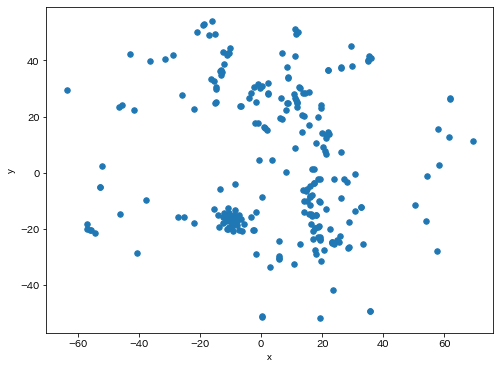

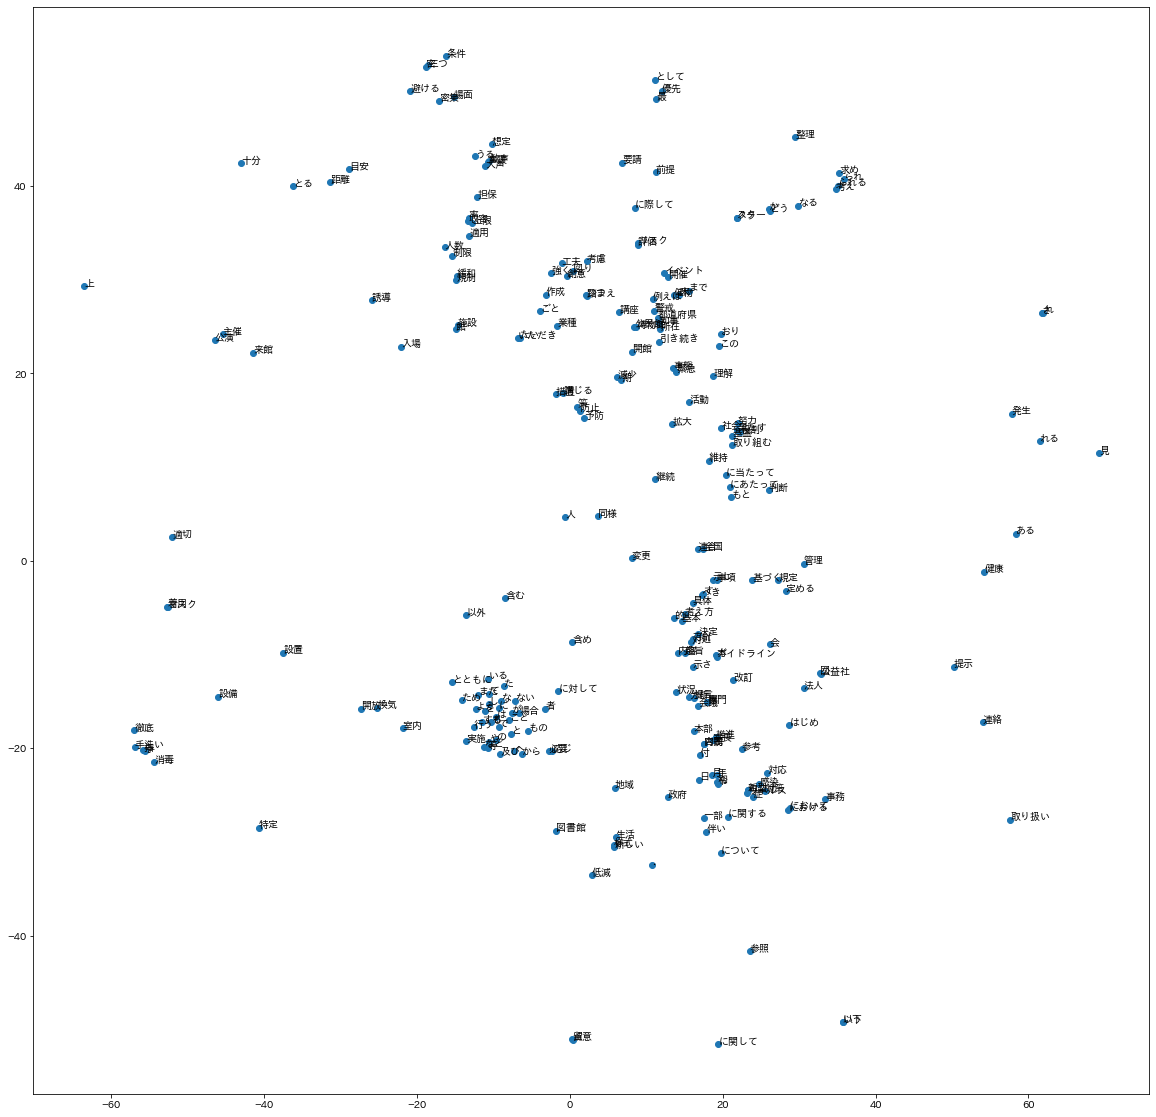

In [ ]:
##tsneで２次元に圧縮＆可視化（ランタイム30〜40sほど）→covid1.png
import matplotlib.pyplot as plt 
!pip install japanize_matplotlib
import japanize_matplotlib  
from matplotlib import font_manager
fp = font_manager.FontProperties(fname="ipag.ttf")
from sklearn.manifold import TSNE

word2vec_model=model

skip=0
limit=241 

vocab = word2vec_model.wv.vocab
emb_tuple = tuple([word2vec_model[v] for v in vocab])
X = np.vstack(emb_tuple)

tsne_model = TSNE(n_components=2, random_state=0,verbose=2)
np.set_printoptions(suppress=True)
tsne_model.fit_transform(X)

plain_tsne = pd.DataFrame(tsne_model.embedding_[skip:limit, 0],columns = ["x"])
plain_tsne["y"] = pd.DataFrame(tsne_model.embedding_[skip:limit, 1])
plain_tsne["word"] = list(vocab)[skip:limit]

# plain_tsne["cluster"] = idx[skip:limit] # クラスタを計算し終わったあとならここでクラスタを付与できます
# plain_tsne.plot.scatter(x="x",y="y",c="cluster",cmap="viridis",figsize=(8, 6),s=30)
plain_tsne.plot.scatter(x="x",y="y",figsize=(8, 6),s=30)

fig = plt.figure(figsize=(20,20))
plt.scatter(tsne_model.embedding_[skip:limit, 0], tsne_model.embedding_[skip:limit, 1])
count = 0
for label, x, y in zip(vocab, tsne_model.embedding_[:, 0], tsne_model.embedding_[:, 1]):
    count +=1
    if(count<skip):continue
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    if(count==limit):break




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2057 samples in 0.036s...
[t-SNE] Computed neighbors for 2057 samples in 1.785s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2057
[t-SNE] Computed conditional probabilities for sample 2000 / 2057
[t-SNE] Computed conditional probabilities for sample 2057 / 2057
[t-SNE] Mean sigma: 0.323531
[t-SNE] Computed conditional probabilities in 0.122s
[t-SNE] Iteration 50: error = 78.6392822, gradient norm = 0.0422579 (50 iterations in 2.031s)
[t-SNE] Iteration 100: error = 78.6337204, gradient norm = 0.0318363 (50 iterations in 1.540s)
[t-SNE] Iteration 150: error = 78.7413635, gradient norm = 0.0279985 (50 iterations in 2.374s)
[t-SNE] Iteration 200: error = 78.6608582, gradient norm = 0.0497569 (50 iterations in 3.144s)
[t-SNE] Iteration 250: error = 78.6314392, gradient norm = 0.0268792 (50 iterations in 1.681s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.631439
[t-SNE] Iteration 300: erro

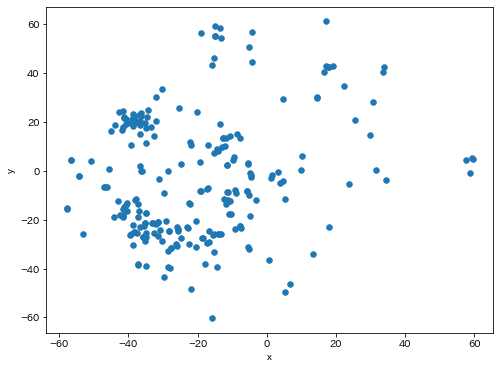

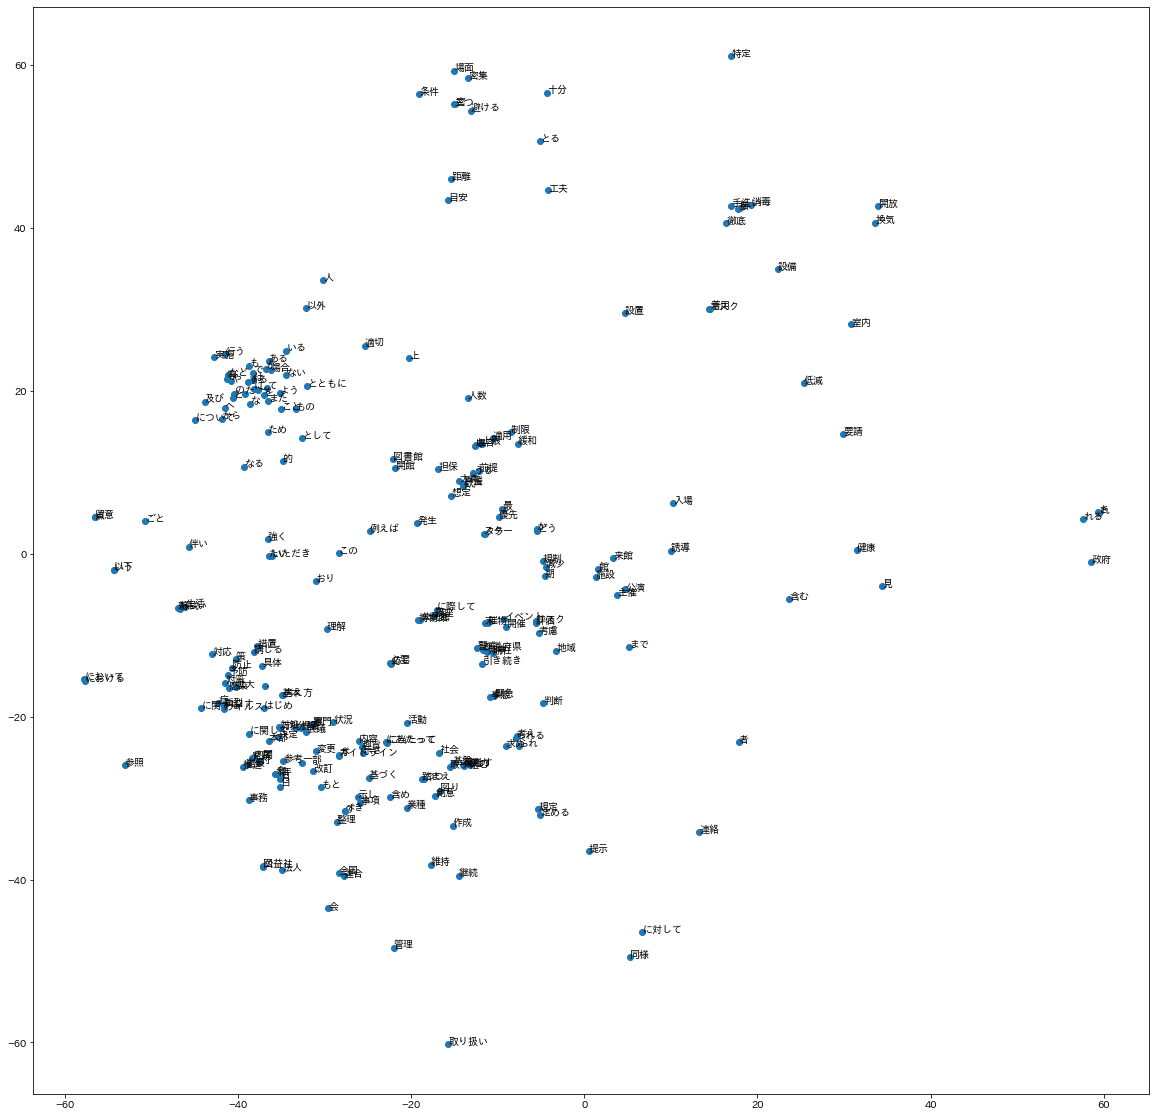

In [ ]:
##2021/08/11実施分

##tsneで２次元に圧縮＆可視化（ランタイム30〜40sほど）→covid1.png
import matplotlib.pyplot as plt 
!pip install japanize_matplotlib
import japanize_matplotlib  
from matplotlib import font_manager
fp = font_manager.FontProperties(fname="ipag.ttf")
from sklearn.manifold import TSNE

word2vec_model=model

skip=0
limit=241 

vocab = word2vec_model.wv.vocab
emb_tuple = tuple([word2vec_model[v] for v in vocab])
X = np.vstack(emb_tuple)

tsne_model = TSNE(n_components=2, random_state=0,verbose=2)
np.set_printoptions(suppress=True)
tsne_model.fit_transform(X)

plain_tsne = pd.DataFrame(tsne_model.embedding_[skip:limit, 0],columns = ["x"])
plain_tsne["y"] = pd.DataFrame(tsne_model.embedding_[skip:limit, 1])
plain_tsne["word"] = list(vocab)[skip:limit]

# plain_tsne["cluster"] = idx[skip:limit] # クラスタを計算し終わったあとならここでクラスタを付与できます
# plain_tsne.plot.scatter(x="x",y="y",c="cluster",cmap="viridis",figsize=(8, 6),s=30)
plain_tsne.plot.scatter(x="x",y="y",figsize=(8, 6),s=30)

fig = plt.figure(figsize=(20,20))
plt.scatter(tsne_model.embedding_[skip:limit, 0], tsne_model.embedding_[skip:limit, 1])
count = 0
for label, x, y in zip(vocab, tsne_model.embedding_[:, 0], tsne_model.embedding_[:, 1]):
    count +=1
    if(count<skip):continue
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    if(count==limit):break




In [ ]:
##必要な関数をコピー

# create gwbowv
from sklearn.feature_extraction.text import TfidfVectorizer,HashingVectorizer
import pickle
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

def cluster_GMM(num_clusters, word_vectors):
    # Initalize a GMM object and use it for clustering.
    clf =  GaussianMixture(n_components=num_clusters,
                    covariance_type="tied", init_params='kmeans', max_iter=50)
    # Get cluster assignments.
    clf.fit(word_vectors)
    idx = clf.predict(word_vectors)
    print ("Clustering Done...", time.time()-start, "seconds")
    # Get probabilities of cluster assignments.
    idx_proba = clf.predict_proba(word_vectors)
    # Dump cluster assignments and probability of cluster assignments. 

    ###コメントアウト↓###
    # pickle.dump(idx, open('../japanese-dataset/livedoor-news-corpus/model/gmm_latestclusmodel_len2alldata.pkl',"wb"))
    print ("Cluster Assignments Saved...")

    ###コメントアウト↓###
    # pickle.dump(idx_proba,open( '../japanese-dataset/livedoor-news-corpus/model/gmm_prob_latestclusmodel_len2alldata.pkl',"wb"))
    print ("Probabilities of Cluster Assignments Saved...")
    return (idx, idx_proba)

###コメントアウト↓###

# def read_GMM(idx_name, idx_proba_name):
#     # Loads cluster assignments and probability of cluster assignments. 
#     idx = pickle.load(open('../japanese-dataset/livedoor-news-corpus/model/gmm_latestclusmodel_len2alldata.pkl',"rb"))
#     idx_proba = pickle.load(open( '../japanese-dataset/livedoor-news-corpus/model/gmm_prob_latestclusmodel_len2alldata.pkl',"rb"))
#     print ("Cluster Model Loaded...")
#     return (idx, idx_proba)

def get_probability_word_vectors(featurenames, word_centroid_map, num_clusters, word_idf_dict):
    # This function computes probability word-cluster vectors
    prob_wordvecs = {}
    for word in word_centroid_map:
        prob_wordvecs[word] = np.zeros( num_clusters * num_features, dtype="float32" )
        for index in range(0, num_clusters):
            try:
                prob_wordvecs[word][index*num_features:(index+1)*num_features] = model[word] * word_centroid_prob_map[word][index] * word_idf_dict[word]
            except:
                continue

    # prob_wordvecs_idf_len2alldata = {}
    # i = 0
    # for word in featurenames:
    #     i += 1
    #     if word in word_centroid_map:    
    #         prob_wordvecs_idf_len2alldata[word] = {}
    #         for index in range(0, num_clusters):
    #                 prob_wordvecs_idf_len2alldata[word][index] = model[word] * word_centroid_prob_map[word][index] * word_idf_dict[word] 



    # for word in prob_wordvecs_idf_len2alldata.keys():
    #     prob_wordvecs[word] = prob_wordvecs_idf_len2alldata[word][0]
    #     for index in prob_wordvecs_idf_len2alldata[word].keys():
    #         if index==0:
    #             continue
    #         prob_wordvecs[word] = np.concatenate((prob_wordvecs[word], prob_wordvecs_idf_len2alldata[word][index]))
    return prob_wordvecs

def create_cluster_vector_and_gwbowv(prob_wordvecs, wordlist, word_centroid_map, word_centroid_prob_map, dimension, word_idf_dict, featurenames, num_centroids, train=False):
    # This function computes SDV feature vectors.
    bag_of_centroids = np.zeros( num_centroids * dimension, dtype="float32" )
    global min_no
    global max_no

    for word in wordlist:
        try:
            temp = word_centroid_map[word]
        except:
            continue

        bag_of_centroids += prob_wordvecs[word]

    norm = np.sqrt(np.einsum('...i,...i', bag_of_centroids, bag_of_centroids))
    if(norm!=0):
        bag_of_centroids /= norm

    # To make feature vector sparse, make note of minimum and maximum values.
    if train:
        min_no += min(bag_of_centroids)
        max_no += max(bag_of_centroids)

    return bag_of_centroids


In [ ]:
word2vec_model=model
num_features = 200     # Word vector dimensionality
min_word_count = 20   # Minimum word count
num_workers = 40       # Number of threads to run in parallel
context = 10          # Context window size
downsampling = 1e-3   # Downsample setting for frequent words

model_name = str(num_features) + "features_" + str(min_word_count) + "minwords_" + str(context) + "context_len2alldata"
# Load the trained Word2Vec model.
model = word2vec_model
# Get wordvectors for all words in vocabulary.
word_vectors = model.wv.syn0

# Load train data.
train,test = train_test_split(df,test_size=0.3,random_state=40)
all = df

# Set number of clusters.
num_clusters = 60
idx, idx_proba = cluster_GMM(num_clusters, word_vectors)

# Create a Word / Index dictionary, mapping each vocabulary word to
# a cluster number
word_centroid_map = dict(zip( model.wv.index2word, idx ))
# Create a Word / Probability of cluster assignment dictionary, mapping each vocabulary word to
# list of probabilities of cluster assignments.
word_centroid_prob_map = dict(zip( model.wv.index2word, idx_proba ))

'''
ここまでで、各単語空間に対するクラスタリングが完了。
word_centroid_mapは各単語のクラスタを示すdict,
word_centroid_prob_mapは各単語のソフトクラスタリングによる各クラスタに属する確率を示すdict.
'''

###TF-IDF値の計算&dictにまとめる
traindata = []
for review in all["content"]:
    result = tokenizer.parse(review).replace("\u3000","").replace("\n","")
    result = re.sub(r'[0123456789０１２３４５６７８９！＠＃＄％＾＆\-|\\＊\“（）＿■×※⇒—●(：〜＋=)／*&^%$#@!~`){}…\[\]\"\'\”:;<>?＜＞？、。・,./『』【】「」→←○]+', "", result)
    h = result.split(" ")
    h = filter(("").__ne__, h)
    traindata.append(" ".join(h))

tfv = TfidfVectorizer(dtype=np.float32)
tfidfmatrix_traindata = tfv.fit_transform(traindata)
featurenames = tfv.get_feature_names()
idf = tfv._tfidf.idf_

# Creating a dictionary with word mapped to its idf value 
print ("Creating word-idf dictionary for Training set...")

word_idf_dict = {}
for pair in zip(featurenames, idf):
    word_idf_dict[pair[0]] = pair[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  if sys.path[0] == '':


Clustering Done... 205.9307463169098 seconds
Cluster Assignments Saved...
Probabilities of Cluster Assignments Saved...
Creating word-idf dictionary for Training set...


In [ ]:
'''
今まで求めて来た各単語のクラスタ,
確率のdictとtfidfのdict,
それとword2vecのモデルを用いて確率で重み付けしたword2vecを求めている。
'''
prob_wordvecs = get_probability_word_vectors(featurenames, word_centroid_map, num_clusters, word_idf_dict)

'''
＜porb_wordvecsの中身＞
{'の': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'を': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'に': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'は': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'が': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'する': array([ 0.,  0.,  0., ..., -0., -0.,  0.], dtype=float32),
 'し': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 '者': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'と': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'て': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 '感染': array([ 0.,  0.,  0., ...,  0., -0., -0.], dtype=float32),
 'で': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 '等': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'こと': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'た': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
'''

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


"\n＜porb_wordvecsの中身＞\n{'の': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),\n 'を': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),\n 'に': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),\n 'は': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),\n 'が': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),\n 'する': array([ 0.,  0.,  0., ..., -0., -0.,  0.], dtype=float32),\n 'し': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),\n '者': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),\n 'と': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),\n 'て': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),\n '感染': array([ 0.,  0.,  0., ...,  0., -0., -0.], dtype=float32),\n 'で': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),\n '等': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),\n 'こと': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),\n 'た': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),\n"

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2057 samples in 2.379s...
[t-SNE] Computed neighbors for 2057 samples in 112.233s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2057
[t-SNE] Computed conditional probabilities for sample 2000 / 2057
[t-SNE] Computed conditional probabilities for sample 2057 / 2057
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.329s
[t-SNE] Iteration 50: error = 84.3022842, gradient norm = 0.2774504 (50 iterations in 1.428s)
[t-SNE] Iteration 100: error = 85.6798096, gradient norm = 0.2949969 (50 iterations in 1.207s)
[t-SNE] Iteration 150: error = 84.6665344, gradient norm = 0.2873624 (50 iterations in 1.174s)
[t-SNE] Iteration 200: error = 83.5196991, gradient norm = 0.3023974 (50 iterations in 1.271s)
[t-SNE] Iteration 250: error = 85.5635757, gradient norm = 0.2995675 (50 iterations in 1.265s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.563576
[t-SNE] Iteration 300: er

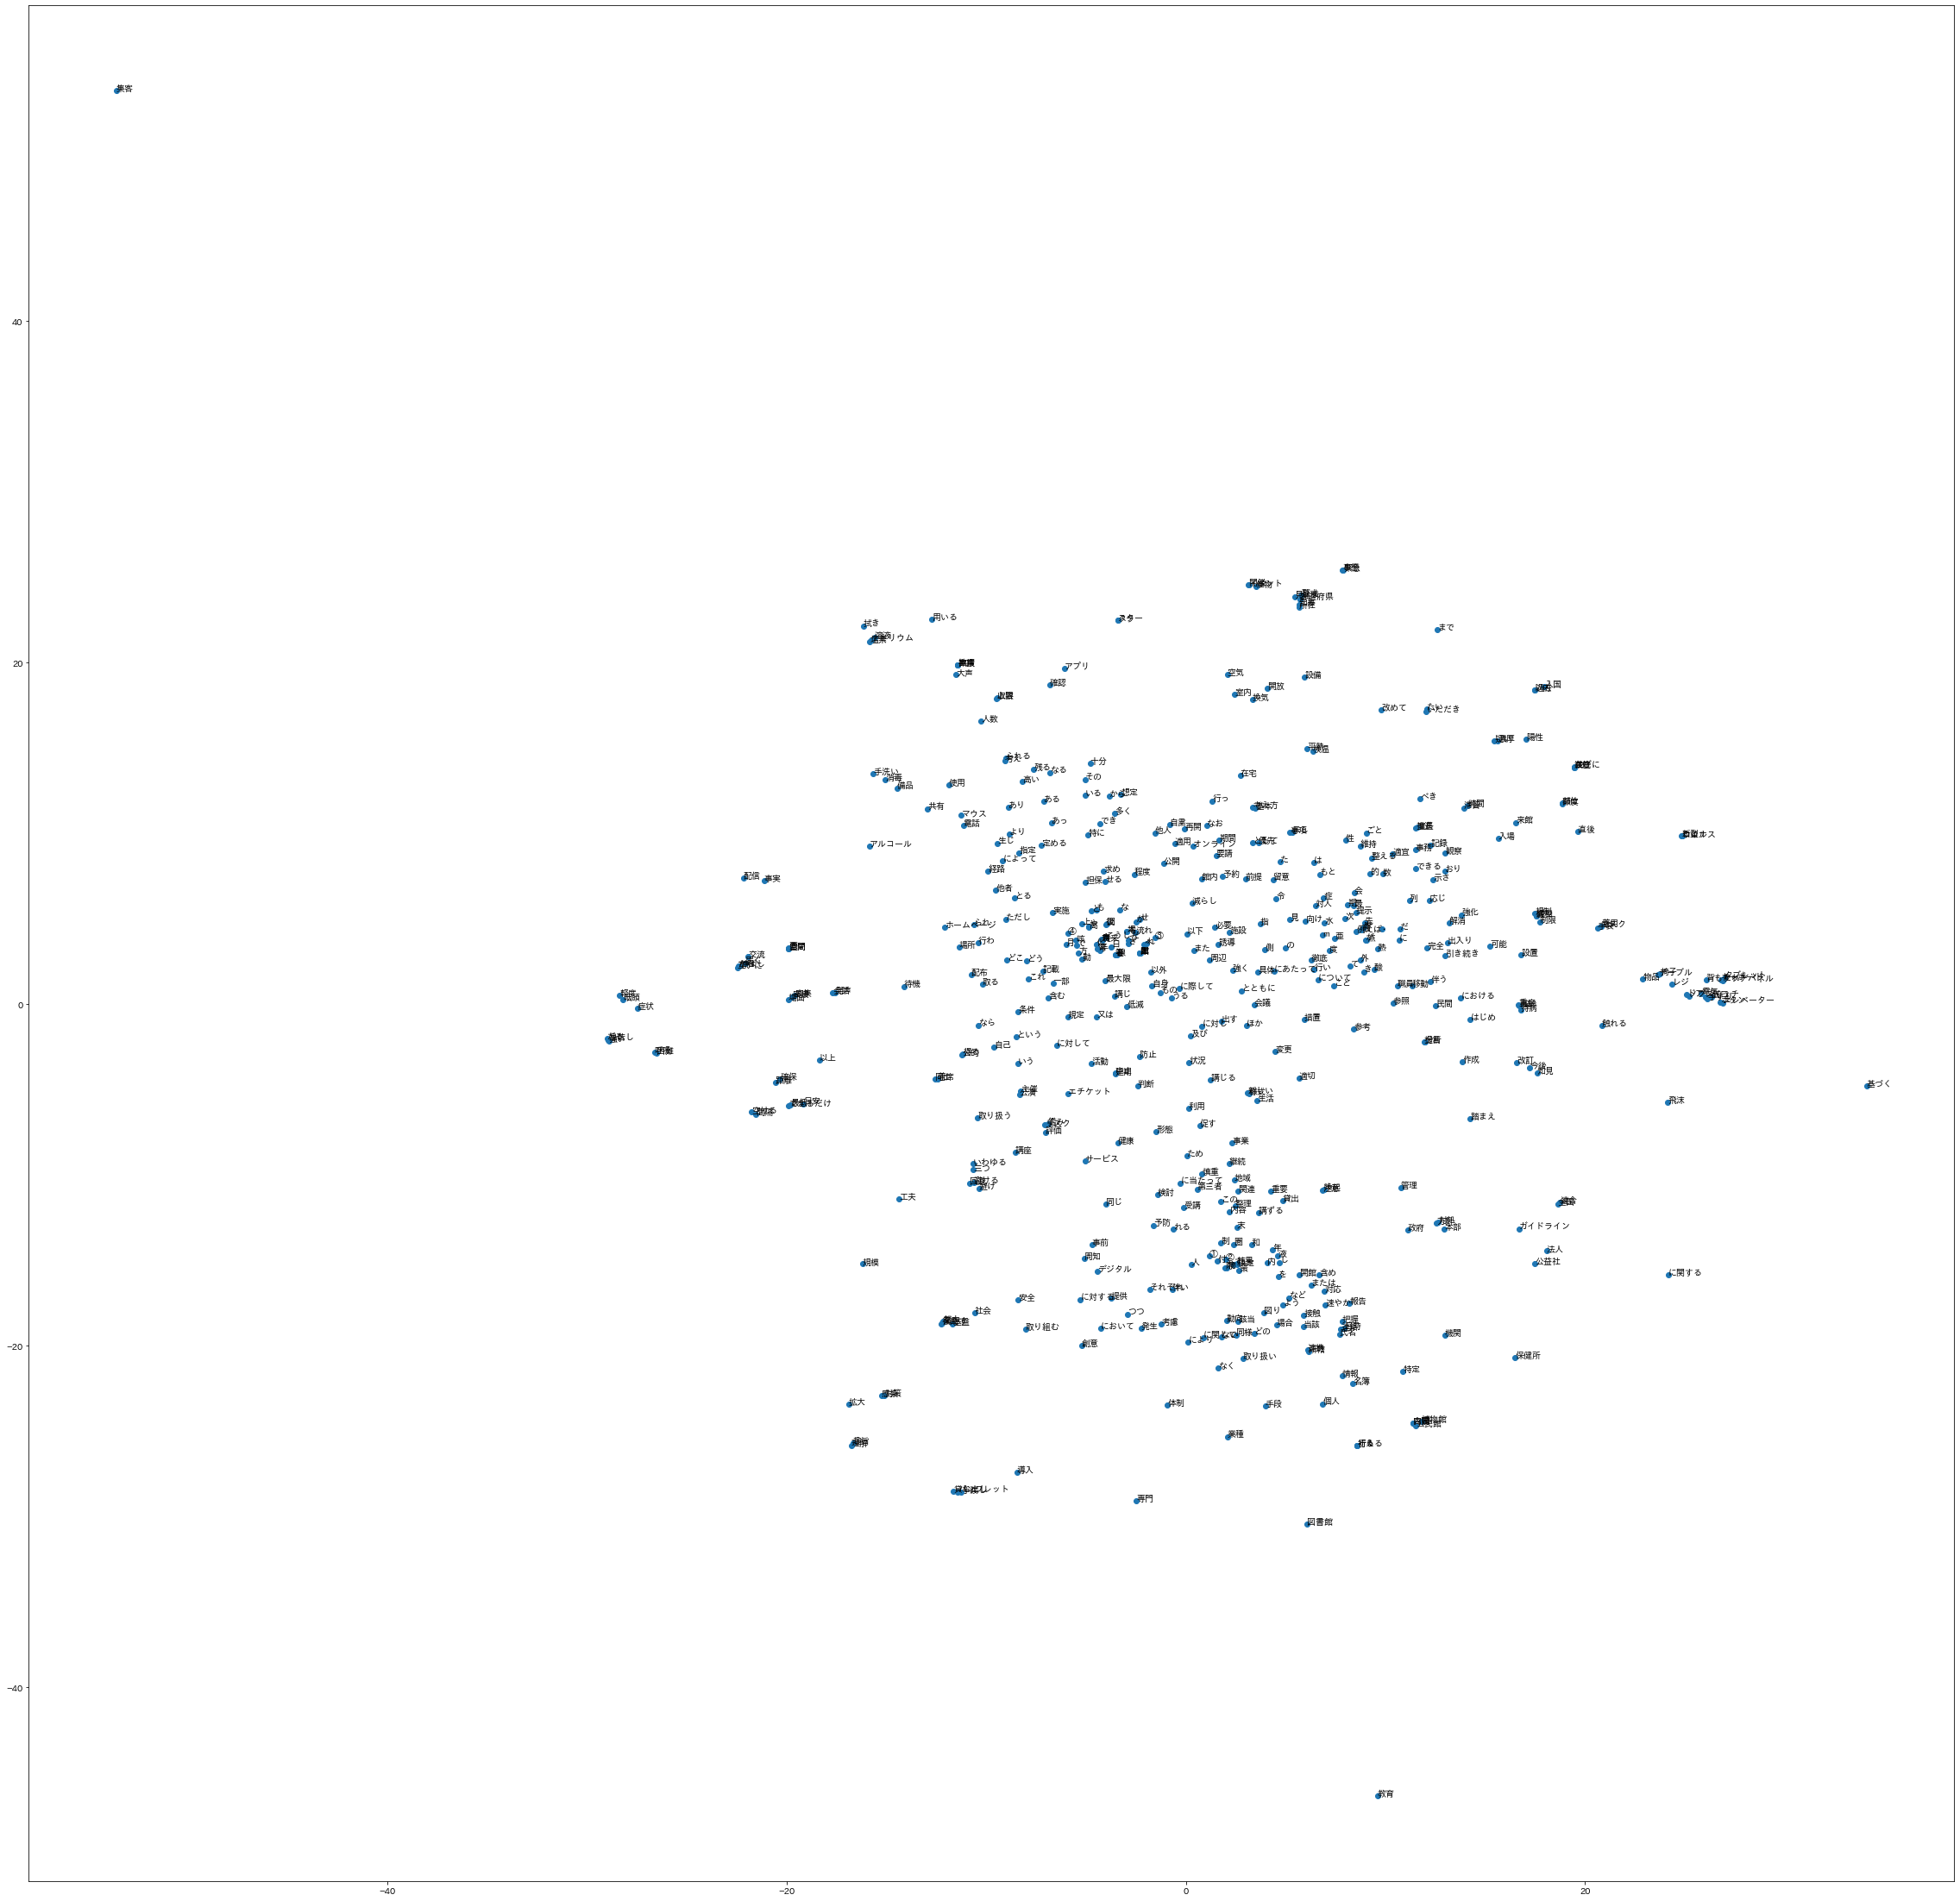

In [ ]:

###変換した後の単語ベクトル空間→covid2.png
skip = 0
limit = 500


vocab = word2vec_model.wv.vocab
emb_tuple_2 = tuple([prob_wordvecs[v] for v in vocab])
X_2 = np.vstack(emb_tuple_2)

tsne_model_2 = TSNE(n_components=2, random_state=0,verbose=2)
np.set_printoptions(suppress=True)
tsne_model_2.fit_transform(X_2)

plain_tsne = pd.DataFrame(tsne_model_2.embedding_[skip:limit, 0],columns = ["x"])
plain_tsne["y"] = pd.DataFrame(tsne_model_2.embedding_[skip:limit, 1])
plain_tsne["word"] = list(vocab)[skip:limit]

fig = plt.figure(figsize=(40,40))
plt.scatter(tsne_model_2.embedding_[skip:limit, 0], tsne_model_2.embedding_[skip:limit, 1])
count = 0
for label, x, y in zip(vocab, tsne_model_2.embedding_[:, 0], tsne_model_2.embedding_[:, 1]):
    count +=1
    if(count<skip):continue
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    if(count==limit):break



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 104 samples in 0.000s...
[t-SNE] Computed neighbors for 104 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 104 / 104
[t-SNE] Mean sigma: 0.035796
[t-SNE] Computed conditional probabilities in 0.013s
[t-SNE] Iteration 50: error = 56.8890495, gradient norm = 0.4621114 (50 iterations in 0.127s)
[t-SNE] Iteration 100: error = 57.9336014, gradient norm = 0.5024230 (50 iterations in 0.028s)
[t-SNE] Iteration 150: error = 57.9760704, gradient norm = 0.4536377 (50 iterations in 0.035s)
[t-SNE] Iteration 200: error = 61.1316681, gradient norm = 0.4799173 (50 iterations in 0.031s)
[t-SNE] Iteration 250: error = 57.9245491, gradient norm = 0.5640041 (50 iterations in 0.028s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.924549
[t-SNE] Iteration 300: error = 0.8382498, gradient norm = 0.0056239 (50 iterations in 0.026s)
[t-SNE] Iteration 350: error = 0.5508118, gradient norm = 0.0039030 (

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


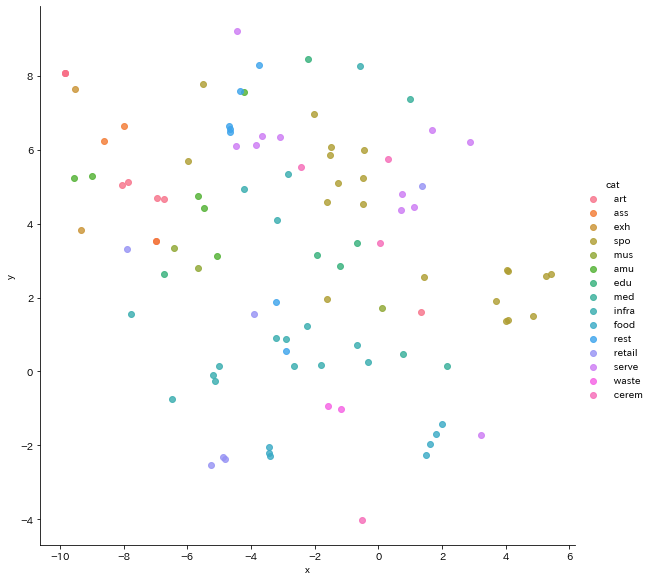

In [ ]:
!pip install seaborn
import seaborn as sns

#document vector visualization
## plain word2vec
def plain_word2vec_document_vector(sentence,word2vec_model,num_features):
    bag_of_centroids = np.zeros(num_features, dtype="float32")

    for word in sentence:
        try:
            temp = word2vec_model[word]
        except:
            continue
        bag_of_centroids += temp

    bag_of_centroids =  bag_of_centroids / len(sentence)

    return bag_of_centroids

plainDocVec_all = {}
counter = 0
num_features = 200

for review in all["content"]:
    # Get the wordlist in each news article.
    result = tokenizer.parse(review).replace("\u3000","").replace("\n","")
    result = re.sub(r'[0123456789０１２３４５６７８９！＠＃＄％＾＆\-|\\＊\“（）＿■×※⇒—●(：〜＋=)／*&^%$#@!~`){}…\[\]\"\'\”:;<>?＜＞？、。・,./『』【】「」→←○]+', "", result)
    h = result.split(" ")
    h = filter(("").__ne__, h)
    words = list(h)
    plainDocVec_all[counter] = plain_word2vec_document_vector(words,word2vec_model,num_features)
    counter+=1
    if counter % 1000 == 0:
        print ("All News Covered : ",counter)

## visualize all document vector
emb_tuple = tuple([plainDocVec_all[v] for v in plainDocVec_all.keys()])
X = np.vstack(emb_tuple)

plain_w2v_doc= TSNE(n_components=2, random_state=0,verbose=2)
np.set_printoptions(suppress=True)
plain_w2v_doc.fit(X)

alldoc_plainw2v_tsne = pd.DataFrame(plain_w2v_doc.embedding_[:, 0],columns = ["x"])
alldoc_plainw2v_tsne["y"] = pd.DataFrame(plain_w2v_doc.embedding_[:, 1])
alldoc_plainw2v_tsne["cat"] = list(all["cat"])

sns.lmplot(data=alldoc_plainw2v_tsne,x="x",y="y",hue="cat",fit_reg=False,size=8)
#

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


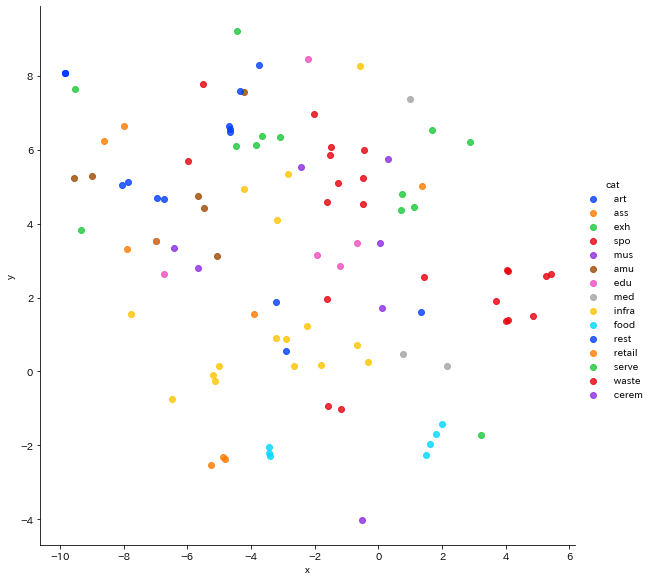

In [ ]:
###配色はdeep, muted, pastel, bright, dark, colorblindの６種
sns.lmplot(data=alldoc_plainw2v_tsne,x="x",y="y",hue="cat",palette='bright',fit_reg=False,size=8)



In [ ]:
alldoc_plainw2v_tsne

,x,y,cat
0,-6.976030,3.523641,art
1,-7.871998,5.122007,art
2,-8.049998,5.045164,art
3,1.332504,1.616022,art
4,-6.966763,4.687360,art
...,...,...,...
99,-1.581747,-0.937108,waste
100,-2.414362,5.527038,cerem
101,0.049392,3.469707,cerem
102,-0.516190,-4.028421,cerem


# コサイン類似度を求める/文章ベクトルを具体化する

In [ ]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [ ]:
lis = np.arange(104)

box = np.zeros((104,104))

(104, 104)

In [ ]:
for a,b in combinations(lis,2):
  box[a][b] = cos_sim(plainDocVec_all[a],plainDocVec_all[b])
  box[b][a] = cos_sim(plainDocVec_all[a],plainDocVec_all[b])
print('finished!')

finished!


In [ ]:
box

array([[0.        , 0.99405819, 0.99392927, ..., 0.98532546, 0.9581632 ,
        0.98219985],
       [0.99405819, 0.        , 0.99755508, ..., 0.98596627, 0.96719807,
        0.9840259 ],
       [0.99392927, 0.99755508, 0.        , ..., 0.98287576, 0.96390128,
        0.98328131],
       ...,
       [0.98532546, 0.98596627, 0.98287576, ..., 0.        , 0.96885121,
        0.9905315 ],
       [0.9581632 , 0.96719807, 0.96390128, ..., 0.96885121, 0.        ,
        0.97548121],
       [0.98219985, 0.9840259 , 0.98328131, ..., 0.9905315 , 0.97548121,
        0.        ]])

In [ ]:
np.save('/content/drive/My Drive/sentence_vector', box)

In [ ]:
import numpy as np

In [ ]:
np.load('/content/drive/My Drive/sentence_vector.npy')

array([[0.        , 0.99405819, 0.99392927, ..., 0.98532546, 0.9581632 ,
        0.98219985],
       [0.99405819, 0.        , 0.99755508, ..., 0.98596627, 0.96719807,
        0.9840259 ],
       [0.99392927, 0.99755508, 0.        , ..., 0.98287576, 0.96390128,
        0.98328131],
       ...,
       [0.98532546, 0.98596627, 0.98287576, ..., 0.        , 0.96885121,
        0.9905315 ],
       [0.9581632 , 0.96719807, 0.96390128, ..., 0.96885121, 0.        ,
        0.97548121],
       [0.98219985, 0.9840259 , 0.98328131, ..., 0.9905315 , 0.97548121,
        0.        ]])

In [ ]:
check = np.load('/content/drive/My Drive/sentence_vector.npy')

In [ ]:
box.mean(axis=1)

array([0.97295319, 0.97203233, 0.97019656, 0.96943574, 0.97000641,
       0.97263213, 0.96017809, 0.96017809, 0.96017809, 0.97295319,
       0.96867723, 0.96856295, 0.95881993, 0.96669689, 0.9675787 ,
       0.95800808, 0.96303536, 0.96300649, 0.96416336, 0.95843968,
       0.95577646, 0.96259915, 0.97092643, 0.95628495, 0.9703767 ,
       0.97293853, 0.97077237, 0.96886825, 0.9723375 , 0.97235167,
       0.97225007, 0.97428119, 0.97326965, 0.96953385, 0.97419059,
       0.97406836, 0.95867692, 0.97153921, 0.97263042, 0.97379473,
       0.96863842, 0.96213012, 0.97048171, 0.97381977, 0.97201942,
       0.96256348, 0.97178492, 0.97286905, 0.95720362, 0.94747538,
       0.96045782, 0.97116271, 0.97041754, 0.96839858, 0.9682679 ,
       0.96302723, 0.96387086, 0.96853861, 0.95782567, 0.97086872,
       0.97237454, 0.96727876, 0.97455692, 0.95819217, 0.97178273,
       0.97266295, 0.97358268, 0.96558687, 0.96791211, 0.96116239,
       0.96852431, 0.96261959, 0.95876688, 0.96599668, 0.97064

In [ ]:
vector_m=pd.DataFrame(box.mean(axis=1),columns=['vector_mean'])
vector_m

,vector_mean
0,0.972953
1,0.972032
2,0.970197
3,0.969436
4,0.970006
...,...
99,0.961430
100,0.973603
101,0.972629
102,0.951153


In [ ]:
dl = pd.concat([df, vector_m], axis=1)

In [ ]:
dl.to_csv('/content/drive/My Drive/text_df_1102_vector.csv')

In [ ]:
df.iloc[95]

title                                       ふるさとホームステイ受入地域団体
url         https://www.maff.go.jp/j/saigai/n_coronavirus...
cat                                                    serve
NFD        b'\xe3\x81\xb5\xe3\x82\x8b\xe3\x81\x95\xe3\x81...
content    1ふるさとホームステイ受入地域団体に求められる「新型コロナウイルス感染拡大予防」の取組～参加...
Name: 95, dtype: object

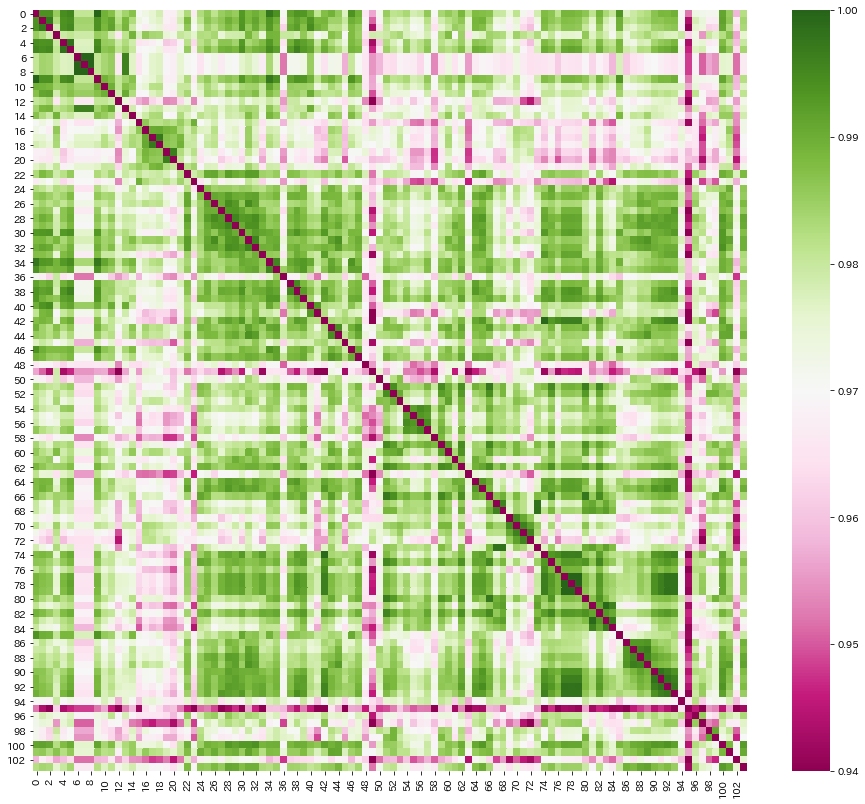

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 14)) 
sns.heatmap(box,vmin=0.94,cmap='PiYG')
plt.savefig('/content/drive/My Drive/vector_heatmap.png')

In [ ]:
plainDocVec_all[1]
for a,b in combinations(lis,2)

array([-0.01998327, -0.01828148, -0.00281987, -0.00225354, -0.02902913,
       -0.01678341, -0.03185174, -0.03213606, -0.02698022,  0.01131899,
       -0.03008578,  0.00247035, -0.02521329, -0.03287363, -0.02218411,
        0.02674928, -0.01843049, -0.03641932, -0.03334195, -0.07093478,
       -0.0594395 , -0.00943349, -0.00123711, -0.01205448, -0.0398198 ,
        0.00956657,  0.00806465,  0.00461586, -0.01784302,  0.02908886,
        0.02862199,  0.00478471, -0.04915021,  0.05251585,  0.01074395,
        0.02711944, -0.09031044, -0.00641199, -0.00420792,  0.04115018,
        0.00947856,  0.03383535,  0.0398498 , -0.02444335, -0.00840587,
       -0.06255578,  0.02307385, -0.07475552,  0.02710725, -0.00478326,
        0.0213486 ,  0.02748479,  0.04601234, -0.03419923,  0.00271598,
        0.04648009, -0.01009365, -0.03615826, -0.07765067, -0.03290924,
        0.03254819, -0.0143296 , -0.02445495, -0.00836431,  0.01358691,
        0.00284918,  0.04166478, -0.03890254,  0.03932811,  0.00

In [ ]:
check = np.load('/content/drive/My Drive/sentence_vector.npy')
check

array([[0.        , 0.99405819, 0.99392927, ..., 0.98532546, 0.9581632 ,
        0.98219985],
       [0.99405819, 0.        , 0.99755508, ..., 0.98596627, 0.96719807,
        0.9840259 ],
       [0.99392927, 0.99755508, 0.        , ..., 0.98287576, 0.96390128,
        0.98328131],
       ...,
       [0.98532546, 0.98596627, 0.98287576, ..., 0.        , 0.96885121,
        0.9905315 ],
       [0.9581632 , 0.96719807, 0.96390128, ..., 0.96885121, 0.        ,
        0.97548121],
       [0.98219985, 0.9840259 , 0.98328131, ..., 0.9905315 , 0.97548121,
        0.        ]])

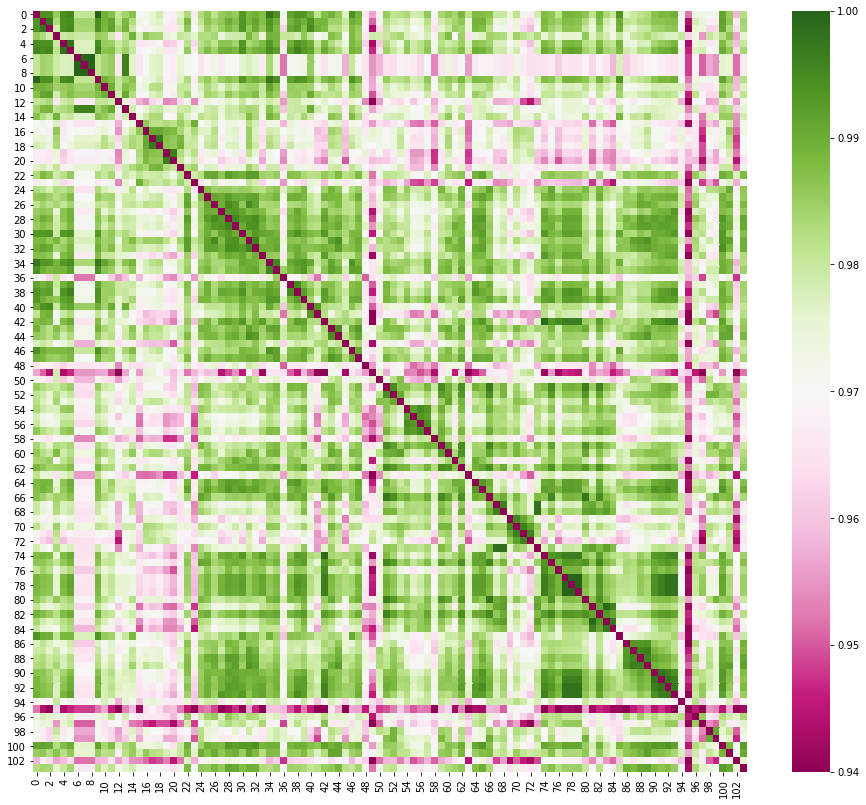

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 14)) 
sns.heatmap(check,vmin=0.94,cmap='PiYG')

# 2021/08/25作業場

In [ ]:
%cd /content/drive/MyDrive/covid_guideline_study
import pandas as pd
cv = pd.read_csv('text_df_1102.csv')

/content/drive/MyDrive/covid_guideline_study


In [ ]:
check.shape

(104, 104)

In [ ]:
len(check)

104

In [ ]:
x = []
for i in range (len(check)):
  x =  x + list(check[i])

In [ ]:
new = [j for j in x if j != 0]
new

[0.9940581917762756,
 0.9939292669296265,
 0.9853927493095398,
 0.9944202899932861,
 0.9954792857170105,
 0.9807656407356262,
 0.9807656407356262,
 0.9807656407356262,
 0.9999999403953552,
 0.9893617630004883,
 0.9871667623519897,
 0.9803440570831299,
 0.9842845797538757,
 0.9869450926780701,
 0.9707547426223755,
 0.972946047782898,
 0.9757155179977417,
 0.9782514572143555,
 0.9679667353630066,
 0.9674897193908691,
 0.9767555594444275,
 0.9830666780471802,
 0.9667094349861145,
 0.9828730225563049,
 0.9857535362243652,
 0.9812033176422119,
 0.985141932964325,
 0.9867492318153381,
 0.9853799939155579,
 0.9930721521377563,
 0.9882128238677979,
 0.9895779490470886,
 0.9874326586723328,
 0.9976003766059875,
 0.9939848184585571,
 0.9711312055587769,
 0.9913654327392578,
 0.9935218095779419,
 0.9932703375816345,
 0.989892840385437,
 0.9810084104537964,
 0.9875505566596985,
 0.989392876625061,
 0.9856582283973694,
 0.9770634770393372,
 0.9937890768051147,
 0.9892763495445251,
 0.96607607603073

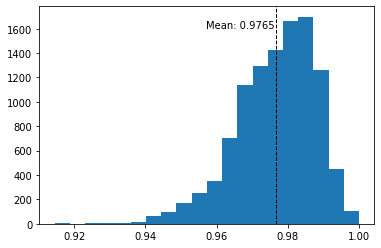

In [ ]:
plt.hist(new,bins=20)
plt.axvline(np.array(new).mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(np.array(new).mean()*0.98,max_ylim*0.9, 'Mean: {:.4f}'.format(np.array(new).mean()))
plt.savefig('/content/drive/My Drive/sim_vector_histogram.png')

In [ ]:
np.array(new).mean()

0.976547295618538

In [ ]:
#標準統計量
pd.DataFrame(pd.Series(np.array(new).ravel()).describe())

,0
count,10712.0000
mean,0.9765
std,0.0111
min,0.9145
25%,0.9696
50%,0.9781
75%,0.9849
max,1.0000


In [ ]:
check[1]

array([0.99405819, 0.        , 0.99755508, 0.98269665, 0.99371284,
       0.99457967, 0.98408091, 0.98408091, 0.98408091, 0.99405819,
       0.98911297, 0.99122238, 0.98175269, 0.98841774, 0.98279589,
       0.97307849, 0.97075135, 0.9751628 , 0.9768157 , 0.96796679,
       0.96644169, 0.97841519, 0.98826814, 0.97293258, 0.981197  ,
       0.98673218, 0.98416722, 0.98633176, 0.98988664, 0.98711169,
       0.99321741, 0.98844808, 0.99121332, 0.98731756, 0.99329954,
       0.98968035, 0.96726155, 0.9891324 , 0.99159843, 0.98945153,
       0.99349177, 0.9885819 , 0.98887801, 0.98450899, 0.98438293,
       0.97998965, 0.98991001, 0.98815107, 0.96872133, 0.95081276,
       0.96835148, 0.98258865, 0.97909564, 0.97753698, 0.97942519,
       0.97341371, 0.97452128, 0.98205638, 0.96706188, 0.97874814,
       0.98197901, 0.98399973, 0.98621923, 0.9751088 , 0.98886085,
       0.98940974, 0.98445302, 0.97413474, 0.97573835, 0.96861887,
       0.97560024, 0.96624833, 0.96263379, 0.973158  , 0.98838

In [ ]:
from itertools import combinations

In [ ]:
lis_box = [0,9,3,2,20,3,6,5,3,16,7,7,6,11,2,4]
sum_lis_box = np.cumsum(lis_box)
ans =[]
for i in range(len(sum_lis_box)-1):
  m = sum_lis_box[i]
  n = sum_lis_box[i+1]
  r = n-m
  arange =np.arange(m,n)
  cnt = 0
  for a,b in combinations(arange,2):
    cnt += check[a][b]
    
  ans.append(cnt*2/(r*(r-1)))

In [ ]:
ans

[0.9862778418593936,
 0.9888022144635519,
 0.9740116000175476,
 0.9803352045385461,
 0.9855470259984335,
 0.9862953225771586,
 0.9864935994148254,
 0.9674722154935201,
 0.9829206809401512,
 0.9857905535470872,
 0.9921056684993562,
 0.9813699762026469,
 0.9764332337812944,
 0.9910362362861633,
 0.981134444475174]

In [ ]:
lis_cat = ['art','ass','exh','spo','mus','amu','edu','med','infra','food','rest','retail','serve','waste','cere']
matrix = pd.DataFrame(ans,lis_cat)
matrix

,0
art,0.986278
ass,0.988802
exh,0.974012
spo,0.980335
mus,0.985547
amu,0.986295
edu,0.986494
med,0.967472
infra,0.982921
food,0.985791


In [ ]:
pd.options.display.float_format = '{:.4f}'.format
matrix.T

,art,ass,exh,spo,mus,amu,edu,med,infra,food,rest,retail,serve,waste,cere
0,0.9863,0.9888,0.9740,0.9803,0.9855,0.9863,0.9865,0.9675,0.9829,0.9858,0.9921,0.9814,0.9764,0.9910,0.9811


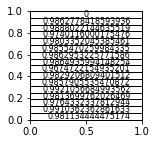

In [ ]:
fig, ax = plt.subplots(figsize=(2,2))
ax.table(cellText=matrix.values,
         colLabels=matrix.columns,
         loc='center',
         bbox=[0,0,1,1])
plt.savefig('table.png')

In [ ]:
cv

,title,url,cat,NFD,content
0,全国公民館連合会,https://www.kominkan.or.jp/file/all/2020/2020...,art,b'\xe5\x85\xa8\xe5\x9b\xbd\xe5\x85\xac\xe6\xb0...,20201002【改訂】公民館における新型コロナウイルス感染拡大予防ガイドライン1公民館にお...
1,日本クラシック音楽事業協会,https://storage.googleapis.com/classicorjp-pu...,art,b'\xe6\x97\xa5\xe6\x9c\xac\xe3\x82\xaf\xe3\x83...,1クラシック音楽公演における新型コロナウイルス感染拡大予防ガイドライン令和２年６月１１日策定...
2,緊急事態舞台芸術ネットワーク,http://jpasn.net/stage_guideline0918d.pdf,art,b'\xe7\xb7\x8a\xe6\x80\xa5\xe4\xba\x8b\xe6\x85...,MicrosoftWord-200918set舞台芸術ガイドライン.docx1舞台芸術公演に...
3,全日本合唱連盟,https://jcanet.or.jp/JCAchorusguideline-ver1_...,art,b'\xe5\x85\xa8\xe6\x97\xa5\xe6\x9c\xac\xe5\x90...,JCAchorusguideline-ver1_1合唱活動における新型コロナウイルス感染症拡...
4,全興連映画館,https://www.zenkoren.or.jp/news-pdf/0919-1_CO...,art,b'\xe5\x85\xa8\xe8\x88\x88\xe9\x80\xa3\xe6\x98...,令和２年８月２０日版からの変更点旧（８月２０日版）新（９月１９日施行版）（P.3）■文言追加...
...,...,...,...,...,...
99,全国産業資源循環連合会,https://www.zensanpairen.or.jp/wp/wp-content/...,waste,b'\xe5\x85\xa8\xe5\x9b\xbd\xe7\x94\xa3\xe6\xa5...,MicrosoftWord-çﬂ£æ¥�å»…æ£—ç›©å⁄¦ç’ƒæ¥�ã†«ã†−ã†...
100,結婚式場業,https://www.bia.or.jp/wp-content/uploads/2020...,cerem,b'\xe7\xb5\x90\xe5\xa9\x9a\xe5\xbc\x8f\xe5\xa0...,令和2年5月14日公益社団法人日本ブライダル文化振興協会一般社団法人全日本冠婚葬祭互助協会結...
101,日本バンケット事業協同組合,https://www.j-banquet.com/img/2020521_corona_...,cerem,b'\xe6\x97\xa5\xe6\x9c\xac\xe3\x83\x8f\xe3\x82...,1/4令和２年５月２１日バンケットレセプタント請負業における新型コロナウイルス感染拡大防止ガ...
102,結婚相手紹介サービス,http://www.jmic.gr.jp/pdf/guideline_corona.pdf,cerem,b'\xe7\xb5\x90\xe5\xa9\x9a\xe7\x9b\xb8\xe6\x89...,新型コロナウイルス感染症拡大防止に向けた結婚相手紹介サービス業界ガイドライン2020年5月2...


In [ ]:
cv.iloc[49]['content']

'新型コロナウイルス感染症対策医療機関向けガイドライン1新型コロナウイルス感染症対策医療機関向けガイドライン１．はじめに新型コロナウイルス感染症は、今般、国際的に大きな広がりを⾒せており、下記の特徴を有するとされています。\uf09e一般的な状況における感染経路の中心は飛沫感染及び接触感染であるが、閉鎖空間において近距離で多くの人と会話する等の一定の環境下であれば、咳やくしゃみ等の症状がなくても感染を拡大させるリスクがあるとされています。また、発症前２日の者や無症候の者からの感染の可能性も指摘されています。\uf09e世界保健機関（WorldHealthOrganization:ＷＨＯ）によると、現時点において潜伏期間は１-14日（一般的には約５-６日）とされています。\uf09e新型コロナウイルスに感染すると、発熱や呼吸器症状が１週間前後持続することが多く、強いだるさ（倦怠感）や強い味覚・嗅覚障害を訴える人が多いことが報告されています。\uf09e罹患しても約８割は軽症で経過し、また、感染者の８割は人への感染はないと報告されています。さらに⼊院例も含めて治癒する例も多いことが報告されています。\uf09e重症度としては、季節性インフルエンザと比べて死亡リスクが高いことが報告されています。\uf09e日本における報告（令和２年４⽉30日公表）では、症例の大部分は20歳以上、重症化の割合は7.7％、致死率は2.5％であり、60歳以上の者及び男性における重症化する割合及び致死率が高いと報告されています。２．我が国の状況我が国においては、2020年１⽉15日に最初の感染者が確認されて以降、2020年７月21日時点で合計26,303人の感染者、合計989人の死亡者を認めています。危機管理上重⼤な課題であることは明白で、政府からは2020年４⽉７⽇に緊急事態宣言が出され、国⺠に不要不急の外出が要請されるなど、過去に類例がない対策がとられました。その後、感染者数の減少が⾒られ、2020年５⽉25日には緊急事態宣言の解除が宣言されています。2しかし、2020年7月頃から、感染者数の再度の大きな波の兆しが⾒られています。日本医師会においては、2020年７⽉15日には「対策再強化宣言」を出し、感染防止対策の再度の徹底を呼びかけたところです。厚⽣労働省HPより（https://www.

In [ ]:
cv[cv['cat'] == ' serve']

,title,url,cat,NFD,content
87,エステティックサロン,https://ajesthe.jp/cms_main/wp-content/upload...,serve,b'\xe3\x82\xa8\xe3\x82\xb9\xe3\x83\x86\xe3\x83...,エステティックサロンにおける新型コロナウイルス対応ガイドライン2020年5月20日Ver.3...
88,日本ネイリスト協会,https://www.nail.or.jp/media/pdf/information/...,serve,b'\xe6\x97\xa5\xe6\x9c\xac\xe3\x83\x8d\xe3\x82...,ネイルサロンにおける新型コロナウイルス感染症対策ガイドライン2020年10月31日Ver.4...
89,日本リラクゼーション業協会,https://www.relaxation-net.jp/wordpress/wp-co...,serve,b'\xe6\x97\xa5\xe6\x9c\xac\xe3\x83\xaa\xe3\x83...,リラクゼーションスペース（店舗）における新型コロナウイルス感染症（ＣＯＶＩＤ-19）対応ガイ...
90,全国理容生活衛生同業組合連合会,http://www.riyo.or.jp/wp-content/uploads/2020...,serve,b'\xe5\x85\xa8\xe5\x9b\xbd\xe7\x90\x86\xe5\xae...,1理容業における新型コロナウイルス感染拡大予防ガイドライン令和２年５月29日策定全国理容生活...
91,全日本美容業生活衛生同業組合連合会,http://www.biyo.or.jp/news/pdf/biyo_guildline...,serve,b'\xe5\x85\xa8\xe6\x97\xa5\xe6\x9c\xac\xe7\xbe...,1美容業における新型コロナウイルス感染拡大予防ガイドライン令和２年５月29日策定全日本美容業...
92,全国クリーニング,https://www.zenkuren.or.jp/wp-content/uploads...,serve,b'\xe5\x85\xa8\xe5\x9b\xbd\xe3\x82\xaf\xe3\x83...,1クリーニング所における新型コロナウイルス感染拡大予防ガイドライン令和２年５月29日策定全国...
93,全国公衆浴場業生活衛生同業組合連合会,http://www.1010.or.jp/zenyoku/img/zenyoku_gui...,serve,b'\xe5\x85\xa8\xe5\x9b\xbd\xe5\x85\xac\xe8\xa1...,MicrosoftWord-登録版（全浴連）公衆浴場ガイドライン.docx浴場業（公衆浴場）...
94,日本旅行業協会,http://jstb.or.jp/files/libs/1923/20200623173...,serve,b'\xe6\x97\xa5\xe6\x9c\xac\xe6\x97\x85\xe8\xa1...,一般社団法人日本旅行業協会：旅行関連業における 新型コロナウイルス対応ガイドラインに基づく国...
95,ふるさとホームステイ受入地域団体,https://www.maff.go.jp/j/saigai/n_coronavirus...,serve,b'\xe3\x81\xb5\xe3\x82\x8b\xe3\x81\x95\xe3\x81...,1ふるさとホームステイ受入地域団体に求められる「新型コロナウイルス感染拡大予防」の取組～参加...
96,日本ファームステイ協会,https://jpcsa.org/press/ncguide-200629.pdf,serve,b'\xe6\x97\xa5\xe6\x9c\xac\xe3\x83\x95\xe3\x82...,農泊施設における新型コロナウイルス対応ガイドライン（第１版）一般社団法人日本ファームステイ協...


In [ ]:
cv.groupby('cat').size()

cat
 amu        6
 art        9
 ass        3
 cerem      4
 edu        5
 exh        2
 food       7
 infra     16
 med        3
 mus        3
 rest       7
 retail     6
 serve     11
 spo       20
 waste      2
dtype: int64

In [ ]:
lis_box = [7,3,2,20,3,6,5,3,15,7,7,6,11,2,4]
sum_lis_box = np.cumsum(lis_box)
sum_lis_box

array([  7,  10,  12,  32,  35,  41,  46,  49,  64,  71,  78,  84,  95,
        97, 101])

In [ ]:
cv

,title,url,cat,NFD,content
0,全国公民館連合会,https://www.kominkan.or.jp/file/all/2020/2020...,art,b'\xe5\x85\xa8\xe5\x9b\xbd\xe5\x85\xac\xe6\xb0...,20201002【改訂】公民館における新型コロナウイルス感染拡大予防ガイドライン1公民館にお...
1,日本クラシック音楽事業協会,https://storage.googleapis.com/classicorjp-pu...,art,b'\xe6\x97\xa5\xe6\x9c\xac\xe3\x82\xaf\xe3\x83...,1クラシック音楽公演における新型コロナウイルス感染拡大予防ガイドライン令和２年６月１１日策定...
2,緊急事態舞台芸術ネットワーク,http://jpasn.net/stage_guideline0918d.pdf,art,b'\xe7\xb7\x8a\xe6\x80\xa5\xe4\xba\x8b\xe6\x85...,MicrosoftWord-200918set舞台芸術ガイドライン.docx1舞台芸術公演に...
3,全日本合唱連盟,https://jcanet.or.jp/JCAchorusguideline-ver1_...,art,b'\xe5\x85\xa8\xe6\x97\xa5\xe6\x9c\xac\xe5\x90...,JCAchorusguideline-ver1_1合唱活動における新型コロナウイルス感染症拡...
4,全興連映画館,https://www.zenkoren.or.jp/news-pdf/0919-1_CO...,art,b'\xe5\x85\xa8\xe8\x88\x88\xe9\x80\xa3\xe6\x98...,令和２年８月２０日版からの変更点旧（８月２０日版）新（９月１９日施行版）（P.3）■文言追加...
...,...,...,...,...,...
99,全国産業資源循環連合会,https://www.zensanpairen.or.jp/wp/wp-content/...,waste,b'\xe5\x85\xa8\xe5\x9b\xbd\xe7\x94\xa3\xe6\xa5...,MicrosoftWord-çﬂ£æ¥�å»…æ£—ç›©å⁄¦ç’ƒæ¥�ã†«ã†−ã†...
100,結婚式場業,https://www.bia.or.jp/wp-content/uploads/2020...,cerem,b'\xe7\xb5\x90\xe5\xa9\x9a\xe5\xbc\x8f\xe5\xa0...,令和2年5月14日公益社団法人日本ブライダル文化振興協会一般社団法人全日本冠婚葬祭互助協会結...
101,日本バンケット事業協同組合,https://www.j-banquet.com/img/2020521_corona_...,cerem,b'\xe6\x97\xa5\xe6\x9c\xac\xe3\x83\x8f\xe3\x82...,1/4令和２年５月２１日バンケットレセプタント請負業における新型コロナウイルス感染拡大防止ガ...
102,結婚相手紹介サービス,http://www.jmic.gr.jp/pdf/guideline_corona.pdf,cerem,b'\xe7\xb5\x90\xe5\xa9\x9a\xe7\x9b\xb8\xe6\x89...,新型コロナウイルス感染症拡大防止に向けた結婚相手紹介サービス業界ガイドライン2020年5月2...


In [ ]:
cv[cv['cat'] == ' art']

,title,url,cat,NFD,content
0,全国公民館連合会,https://www.kominkan.or.jp/file/all/2020/2020...,art,b'\xe5\x85\xa8\xe5\x9b\xbd\xe5\x85\xac\xe6\xb0...,20201002【改訂】公民館における新型コロナウイルス感染拡大予防ガイドライン1公民館にお...
1,日本クラシック音楽事業協会,https://storage.googleapis.com/classicorjp-pu...,art,b'\xe6\x97\xa5\xe6\x9c\xac\xe3\x82\xaf\xe3\x83...,1クラシック音楽公演における新型コロナウイルス感染拡大予防ガイドライン令和２年６月１１日策定...
2,緊急事態舞台芸術ネットワーク,http://jpasn.net/stage_guideline0918d.pdf,art,b'\xe7\xb7\x8a\xe6\x80\xa5\xe4\xba\x8b\xe6\x85...,MicrosoftWord-200918set舞台芸術ガイドライン.docx1舞台芸術公演に...
3,全日本合唱連盟,https://jcanet.or.jp/JCAchorusguideline-ver1_...,art,b'\xe5\x85\xa8\xe6\x97\xa5\xe6\x9c\xac\xe5\x90...,JCAchorusguideline-ver1_1合唱活動における新型コロナウイルス感染症拡...
4,全興連映画館,https://www.zenkoren.or.jp/news-pdf/0919-1_CO...,art,b'\xe5\x85\xa8\xe8\x88\x88\xe9\x80\xa3\xe6\x98...,令和２年８月２０日版からの変更点旧（８月２０日版）新（９月１９日施行版）（P.3）■文言追加...
5,全興連演芸場,https://www.zenkoren.or.jp/news-pdf/0919-2_CO...,art,b'\xe5\x85\xa8\xe8\x88\x88\xe9\x80\xa3\xe6\xbc...,1令和２年５月２９日版からの変更点旧（５月２９日版）新（９月１９日改訂版）（P.４）■文言追...
6,コンサートプロモーターズ協会,http://www.acpc.or.jp/pdf/COVID-19/20201008_0...,art,b'\xe3\x82\xb3\xe3\x83\xb3\xe3\x82\xb5\xe3\x83...,1/16音楽コンサートにおける新型コロナウイルス感染予防対策ガイドライン令和2年10月8日改...
7,日本音楽事業者協会,https://www.jame.or.jp/wordpress/wp-content/u...,art,b'\xe6\x97\xa5\xe6\x9c\xac\xe9\x9f\xb3\xe6\xa5...,1/16音楽コンサートにおける新型コロナウイルス感染予防対策ガイドライン令和2年10月8日改...
8,日本音楽制作者連盟,http://www.fmp.or.jp/information/wp-content/u...,art,b'\xe6\x97\xa5\xe6\x9c\xac\xe9\x9f\xb3\xe6\xa5...,1/16音楽コンサートにおける新型コロナウイルス感染予防対策ガイドライン令和2年10月8日改...


# 予測

In [ ]:
gwbowv = np.zeros( (train["content"].size, num_clusters*(num_features)), dtype="float32")

counter = 0

min_no = 0
max_no = 0
for review in train["content"]:
    # Get the wordlist in each news article.
    result = tokenizer.parse(review).replace("\u3000","").replace("\n","")
    result = re.sub(r'[0123456789０１２３４５６７８９！＠＃＄％＾＆\-|\\＊\“（）＿■×※⇒—●(：〜＋=)／*&^%$#@!~`){}…\[\]\"\'\”:;<>?＜＞？、。・,./『』【】「」→←○]+', "", result)
    h = result.split(" ")
    h = filter(("").__ne__, h)
    words = h
    gwbowv[counter] = create_cluster_vector_and_gwbowv(prob_wordvecs, words, word_centroid_map, word_centroid_prob_map, num_features, word_idf_dict, featurenames, num_clusters, train=True)
    counter+=1
    if counter % 1000 == 0:
        print ("Train Content Covered : ",counter)

gwbowv_name = "SDV_" + str(num_clusters) + "cluster_" + str(num_features) + "feature_matrix_gmm_sparse.npy"

gwbowv_test = np.zeros( (test["content"].size, num_clusters*(num_features)), dtype="float32")

counter = 0

for review in test["content"]:
    # Get the wordlist in each news article.
    result = tokenizer.parse(review).replace("\u3000","").replace("\n","")
    result = re.sub(r'[0123456789０１２３４５６７８９！＠＃＄％＾＆\-|\\＊\“（）＿■×※⇒—●(：〜＋=)／*&^%$#@!~`){}…\[\]\"\'\”:;<>?＜＞？、。・,./『』【】「」→←○]+', "", result)
    h = result.split(" ")
    h = filter(("").__ne__, h)
    words = h
    gwbowv_test[counter] = create_cluster_vector_and_gwbowv(prob_wordvecs, words, word_centroid_map, word_centroid_prob_map, num_features, word_idf_dict, featurenames, num_clusters)
    counter+=1
    if counter % 1000 == 0:
        print ("Test Content Covered : ",counter)

test_gwbowv_name = "TEST_SDV_" + str(num_clusters) + "cluster_" + str(num_features) + "feature_matrix_gmm_sparse.npy"

print ("Making sparse...")
# Set the threshold percentage for making it sparse. 
percentage = 0.04
min_no = min_no*1.0/len(train["content"])
max_no = max_no*1.0/len(train["content"])
print ("Average min: ", min_no)
print ("Average max: ", max_no)
thres = (abs(max_no) + abs(min_no))/2
thres = thres*percentage

# Make values of matrices which are less than threshold to zero.
temp = abs(gwbowv) < thres
gwbowv[temp] = 0

temp = abs(gwbowv_test) < thres
gwbowv_test[temp] = 0


Making sparse...
Average min:  -0.1095040329835481
Average max:  0.12149334771351682


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2057 samples in 2.318s...
[t-SNE] Computed neighbors for 2057 samples in 113.541s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2057
[t-SNE] Computed conditional probabilities for sample 2000 / 2057
[t-SNE] Computed conditional probabilities for sample 2057 / 2057
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.334s
[t-SNE] Iteration 50: error = 84.3022842, gradient norm = 0.2774504 (50 iterations in 1.404s)
[t-SNE] Iteration 100: error = 85.6798096, gradient norm = 0.2949969 (50 iterations in 1.200s)
[t-SNE] Iteration 150: error = 84.6665344, gradient norm = 0.2873624 (50 iterations in 1.139s)
[t-SNE] Iteration 200: error = 83.5196991, gradient norm = 0.3023974 (50 iterations in 1.292s)
[t-SNE] Iteration 250: error = 85.5635757, gradient norm = 0.2995675 (50 iterations in 1.252s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.563576
[t-SNE] Iteration 300: er

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


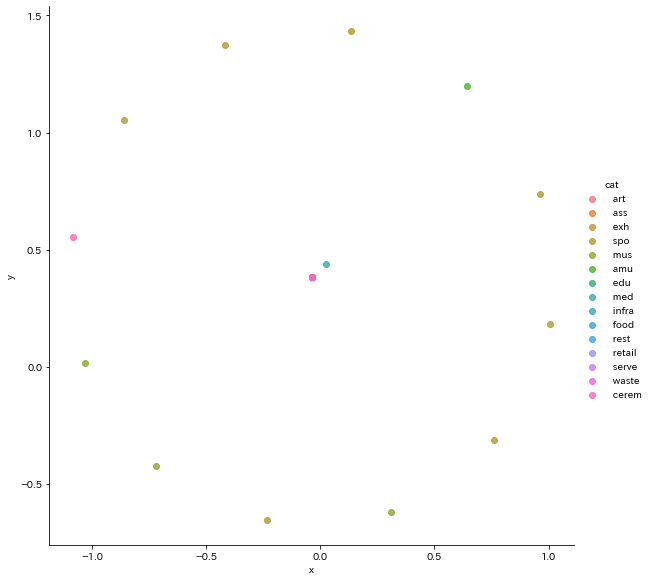

In [ ]:
##SCDVによるモデル
plainDocVec_all = {}
counter = 0
num_features = 200

emb_tuple = tuple([prob_wordvecs[v] for v in vocab])
X_0 = np.vstack(emb_tuple)

tsne_model = TSNE(n_components=2, random_state=0,verbose=2)
np.set_printoptions(suppress=True)
tsne_model.fit_transform(X_0)



for review in all["content"]:
    # Get the wordlist in each news article.
    result = tokenizer.parse(review).replace("\u3000","").replace("\n","")
    result = re.sub(r'[0123456789０１２３４５６７８９！＠＃＄％＾＆\-|\\＊\“（）＿■×※⇒—●(：〜＋=)／*&^%$#@!~`){}…\[\]\"\'\”:;<>?＜＞？、。・,./『』【】「」→←○]+', "", result)
    h = result.split(" ")
    h = filter(("").__ne__, h)
    words = list(h)
    plainDocVec_all[counter] = plain_word2vec_document_vector(words,X_0,num_features)
    counter+=1
    if counter % 1000 == 0:
        print ("All News Covered : ",counter)

## visualize all document vector
emb_tuple = tuple([plainDocVec_all[v] for v in plainDocVec_all.keys()])
X = np.vstack(emb_tuple)

plain_w2v_doc= TSNE(n_components=2, random_state=0,verbose=2)
np.set_printoptions(suppress=True)
plain_w2v_doc.fit(X)

alldoc_plainw2v_tsne = pd.DataFrame(plain_w2v_doc.embedding_[:, 0],columns = ["x"])
alldoc_plainw2v_tsne["y"] = pd.DataFrame(plain_w2v_doc.embedding_[:, 1])
alldoc_plainw2v_tsne["cat"] = list(all["cat"])

sns.lmplot(data=alldoc_plainw2v_tsne,x="x",y="y",hue="cat",fit_reg=False,size=8)


In [ ]:
from sklearn.metrics import classification_report
import lightgbm as lgb

start = time.time()
clf = lgb.LGBMClassifier(objective="multiclass")
clf.fit(gwbowv, train["cat"])
Y_true, Y_pred  = test["cat"], clf.predict(gwbowv_test)
print ("Report")
print (classification_report(Y_true, Y_pred, digits=6))
print ("Accuracy: ",clf.score(gwbowv_test,test["cat"]))
print ("Time taken:", time.time() - start, "\n")


Report
              precision    recall  f1-score   support

         amu   0.500000  0.500000  0.500000         2
         art   0.666667  1.000000  0.800000         2
         ass   0.000000  0.000000  0.000000         2
       cerem   0.000000  0.000000  0.000000         1
         edu   0.000000  0.000000  0.000000         1
        food   1.000000  1.000000  1.000000         2
       infra   0.571429  1.000000  0.727273         4
        rest   1.000000  0.333333  0.500000         3
      retail   0.000000  0.000000  0.000000         1
       serve   0.500000  0.200000  0.285714         5
         spo   0.538462  0.875000  0.666667         8
       waste   0.000000  0.000000  0.000000         1

    accuracy                       0.562500        32
   macro avg   0.398046  0.409028  0.373304        32
weighted avg   0.513336  0.562500  0.492844        32

Accuracy:  0.5625
Time taken: 4.978752374649048 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 各catごとの類似度を出してみる

In [ ]:
precision = np.load('/content/drive/My Drive/sentence_vector.npy')
precision

array([[0.        , 0.99405819, 0.99392927, ..., 0.98532546, 0.9581632 ,
        0.98219985],
       [0.99405819, 0.        , 0.99755508, ..., 0.98596627, 0.96719807,
        0.9840259 ],
       [0.99392927, 0.99755508, 0.        , ..., 0.98287576, 0.96390128,
        0.98328131],
       ...,
       [0.98532546, 0.98596627, 0.98287576, ..., 0.        , 0.96885121,
        0.9905315 ],
       [0.9581632 , 0.96719807, 0.96390128, ..., 0.96885121, 0.        ,
        0.97548121],
       [0.98219985, 0.9840259 , 0.98328131, ..., 0.9905315 , 0.97548121,
        0.        ]])

104

In [ ]:
from itertools import combinations

In [ ]:
lis_box = [7,3,2,20,3,6,5,3,15,7,7,6,11,2,4]
ans =[]
for r in lis_box:
  arange =np.arange(r)
  cnt = 0
  for a,b in combinations(arange,2):
    cnt += precision[a][b]
    
  ans.append(cnt*2/(r*(r-1)))

In [ ]:
min(ans)

0.979940180402053

In [ ]:
ans

[0.9876631100972494,
 0.9951808452606201,
 0.9940581917762756,
 0.979940180402053,
 0.9951808452606201,
 0.9905591209729513,
 0.9893664300441742,
 0.9951808452606201,
 0.9847515463829041,
 0.9876631100972494,
 0.9876631100972494,
 0.9905591209729513,
 0.9868253469467163,
 0.9940581917762756,
 0.9886648754278818]

In [ ]:
lis_cat = ['art','ass','exh','spo','mus','amu','edu','med','infra','food','rest','retail','serve','waste','cere']
pd.DataFrame(ans,lis_cat)

,0
art,0.987663
ass,0.995181
exh,0.994058
spo,0.979940
mus,0.995181
amu,0.990559
edu,0.989366
med,0.995181
infra,0.984752
food,0.987663


In [ ]:
set(cv['cat'])

{' amu',
 ' art',
 ' ass',
 ' cerem',
 ' edu',
 ' exh',
 ' food',
 ' infra',
 ' med',
 ' mus',
 ' rest',
 ' retail',
 ' serve',
 ' spo',
 ' waste'}

In [ ]:
cv = pd.read_csv('text_df_1102.csv')
cv

,title,url,cat,NFD,content
0,全国公民館連合会,https://www.kominkan.or.jp/file/all/2020/2020...,art,b'\xe5\x85\xa8\xe5\x9b\xbd\xe5\x85\xac\xe6\xb0...,20201002【改訂】公民館における新型コロナウイルス感染拡大予防ガイドライン1公民館にお...
1,日本クラシック音楽事業協会,https://storage.googleapis.com/classicorjp-pu...,art,b'\xe6\x97\xa5\xe6\x9c\xac\xe3\x82\xaf\xe3\x83...,1クラシック音楽公演における新型コロナウイルス感染拡大予防ガイドライン令和２年６月１１日策定...
2,緊急事態舞台芸術ネットワーク,http://jpasn.net/stage_guideline0918d.pdf,art,b'\xe7\xb7\x8a\xe6\x80\xa5\xe4\xba\x8b\xe6\x85...,MicrosoftWord-200918set舞台芸術ガイドライン.docx1舞台芸術公演に...
3,全日本合唱連盟,https://jcanet.or.jp/JCAchorusguideline-ver1_...,art,b'\xe5\x85\xa8\xe6\x97\xa5\xe6\x9c\xac\xe5\x90...,JCAchorusguideline-ver1_1合唱活動における新型コロナウイルス感染症拡...
4,全興連映画館,https://www.zenkoren.or.jp/news-pdf/0919-1_CO...,art,b'\xe5\x85\xa8\xe8\x88\x88\xe9\x80\xa3\xe6\x98...,令和２年８月２０日版からの変更点旧（８月２０日版）新（９月１９日施行版）（P.3）■文言追加...
...,...,...,...,...,...
99,全国産業資源循環連合会,https://www.zensanpairen.or.jp/wp/wp-content/...,waste,b'\xe5\x85\xa8\xe5\x9b\xbd\xe7\x94\xa3\xe6\xa5...,MicrosoftWord-çﬂ£æ¥�å»…æ£—ç›©å⁄¦ç’ƒæ¥�ã†«ã†−ã†...
100,結婚式場業,https://www.bia.or.jp/wp-content/uploads/2020...,cerem,b'\xe7\xb5\x90\xe5\xa9\x9a\xe5\xbc\x8f\xe5\xa0...,令和2年5月14日公益社団法人日本ブライダル文化振興協会一般社団法人全日本冠婚葬祭互助協会結...
101,日本バンケット事業協同組合,https://www.j-banquet.com/img/2020521_corona_...,cerem,b'\xe6\x97\xa5\xe6\x9c\xac\xe3\x83\x8f\xe3\x82...,1/4令和２年５月２１日バンケットレセプタント請負業における新型コロナウイルス感染拡大防止ガ...
102,結婚相手紹介サービス,http://www.jmic.gr.jp/pdf/guideline_corona.pdf,cerem,b'\xe7\xb5\x90\xe5\xa9\x9a\xe7\x9b\xb8\xe6\x89...,新型コロナウイルス感染症拡大防止に向けた結婚相手紹介サービス業界ガイドライン2020年5月2...


In [ ]:
cv.iloc[95]

title                                       ふるさとホームステイ受入地域団体
url         https://www.maff.go.jp/j/saigai/n_coronavirus...
cat                                                    serve
NFD        b'\xe3\x81\xb5\xe3\x82\x8b\xe3\x81\x95\xe3\x81...
content    1ふるさとホームステイ受入地域団体に求められる「新型コロナウイルス感染拡大予防」の取組～参加...
Name: 95, dtype: object